# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from tqdm.auto import tqdm

# Data

In [4]:
import os, cv2

In [5]:
X = []
y = []

for digit in tqdm(os.listdir('../data/ddigi/numerals/')):
    for img in os.listdir(f'../data/ddigi/numerals/{digit}'):
        i = plt.imread(f'../data/ddigi/numerals/{digit}/{img}', 0)
        X.append(i)
        y.append(digit)
        
X = np.array(X)
y = np.array(y)

p = np.random.permutation(len(X))
X, y =  X[p], y[p]

In [6]:
print('Data Set')
print(len(X))
print(X.shape)
print(y.shape)

Data Set
2880
(2880, 28, 28)
(2880,)


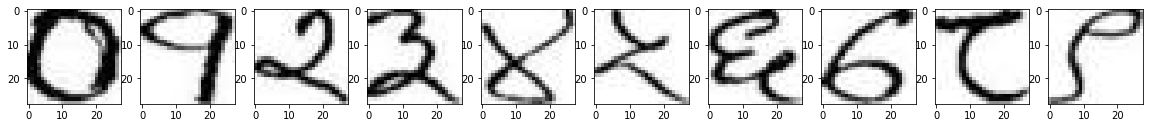

In [7]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X[y == str(i)][0],cmap=plt.get_cmap('gray'))

In [8]:
def pad_img(img, pad_size=3):
    return (cv2.resize(
        cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=255), 
        (28, 28)
    ))

In [9]:
X_cpy = X
X = []
for img in X_cpy:
    X.append(pad_img(img, 4))
X = np.array(X)

In [10]:
X = X.astype('float32')
X /= 255.0

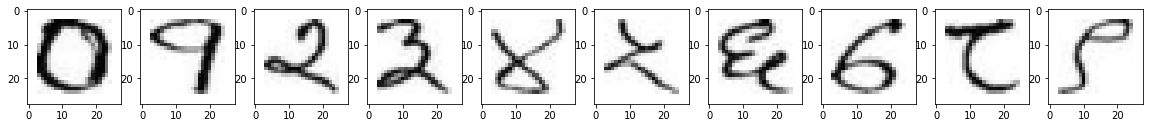

In [11]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X[y == str(i)][0],cmap=plt.get_cmap('gray'))

In [12]:
import sys
sys.path.append('../')

from utils.image import ImageAugmenter
from keras.preprocessing.image import ImageDataGenerator

img_aug = ImageDataGenerator(
    rotation_range=10, 
    zoom_range = 0.1,
    width_shift_range=0.1, 
    height_shift_range=0.1,
)

ia_o = ImageAugmenter(img_aug, n_images=7000, cmap='gray')
ia_o.fit_transform('../data/ddigi/numerals/', '../data/ddigi/numerals-augmented')

Using TensorFlow backend.


Class Distribution: [288, 288, 288, 288, 288, 288, 288, 288, 288, 288]



Updated Class Distribution
Training: [7012, 0, 0, 0, 0, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 0, 0, 0, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 0, 0, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 0, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 7001, 0, 0, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 7001, 6996, 0, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 7001, 6996, 6998, 0, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 7001, 6996, 6998, 7000, 0, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 7001, 6996, 6998, 7000, 7002, 0]



Updated Class Distribution
Training: [7012, 6990, 7005, 7003, 7001, 6996, 6998, 7000, 7002, 6996]
